<a href="https://colab.research.google.com/github/irinaachikhmina/Triplexes/blob/main/1_02_Triplex_regions_mm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data mining and preprocessing: H-DNA regions in mouse genome

##Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c bioconda bedtools

In [ ]:
!pip install biopython

In [ ]:
!pip install pybedtools
from pybedtools import BedTool

In [ ]:
import pandas as pd
import numpy as np
import math
import pickle
from tqdm.notebook import tqdm
from random import sample

import seaborn as sns
import matplotlib.pyplot as plt

import Bio
from Bio import SeqIO

In [ ]:
sns.set(font_scale=1)
sns.set_style("ticks") 

#Genome mm10

https://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/

In [ ]:
chrom_names = [f'chr{i}' for i in list(range(1, 20)) + ['X', 'Y']]

In [ ]:
!gunzip '/content/drive/MyDrive/Triplexes/data/mm10'/*

#Triplex DNA regions

##Experimental data

Triplex DNA regions from Kouzine and Wojtowicz work (Kouzine F, Wojtowicz D, Baranello L, et al. Permanganate/S1 Nuclease Footprinting Reveals Non-B DNA Structures with Regulatory Potential across a Mammalian Genome. Cell Syst. 2017;4(3):344-356.e7. doi:10.1016/j.cels.2017.01.013)

In [ ]:
!gdown https://www.ncbi.nlm.nih.gov/CBBresearch/Przytycka/software/nonbdna/nonB_DNA_ssDNA_enriched.tar

Downloading...
From: https://www.ncbi.nlm.nih.gov/CBBresearch/Przytycka/software/nonbdna/nonB_DNA_ssDNA_enriched.tar
To: /content/nonB_DNA_ssDNA_enriched.tar
1.50MB [00:00, 9.82MB/s]


In [ ]:
!tar -xvf '/content/nonB_DNA_ssDNA_enriched.tar'

nonB_DNA_ssDNA_enriched/
nonB_DNA_ssDNA_enriched/human_hg19/
nonB_DNA_ssDNA_enriched/human_hg19/Raji_ssDNA_enriched_H-DNA.bed.gz
nonB_DNA_ssDNA_enriched/human_hg19/Raji_ssDNA_enriched_Quadruplex.bed.gz
nonB_DNA_ssDNA_enriched/human_hg19/Raji_ssDNA_enriched_SIDD.bed.gz
nonB_DNA_ssDNA_enriched/human_hg19/Raji_ssDNA_enriched_Z-DNA.bed.gz
nonB_DNA_ssDNA_enriched/mouse_mm9/
nonB_DNA_ssDNA_enriched/mouse_mm9/actB_ssDNA_enriched_H-DNA.bed.gz
nonB_DNA_ssDNA_enriched/mouse_mm9/actB_ssDNA_enriched_Quadruplex.bed.gz
nonB_DNA_ssDNA_enriched/mouse_mm9/actB_ssDNA_enriched_SIDD.bed.gz
nonB_DNA_ssDNA_enriched/mouse_mm9/actB_ssDNA_enriched_Z-DNA.bed.gz


In [ ]:
GF = BedTool('/content/nonB_DNA_ssDNA_enriched/mouse_mm9/actB_ssDNA_enriched_H-DNA.bed.gz')
len(GF)

17109

##Assembly convertion to mm10

liftOver site at https://genome.ucsc.edu/cgi-bin/hgLiftOver

In [ ]:
GF = BedTool('/content/hglft_genome_1d8f0_6696e0.bed')
len(GF)

17100

9 regions deleted in new assembly

In [ ]:
length =[]
for el in GF:
    length.append(el.end - el.start)

print('Number of regions:', len(GF))
print('Average length of region:', round(sum(length) / len(length)))
print('Max length of region:', round(max(length)))
print('Min length of region:', round(min(length)))
print('First line:', GF[0])

Number of regions: 17100
Average length of region: 33
Max length of region: 99
Min length of region: 16
First line: chr1	3175239	3175255	chr1:3165321-3165336	1



##Filtering

Filtering for black-listed regions

In [ ]:
!gdown https://github.com/Boyle-Lab/Blacklist/raw/master/lists/mm10-blacklist.v2.bed.gz

Downloading...
From: https://github.com/Boyle-Lab/Blacklist/raw/master/lists/mm10-blacklist.v2.bed.gz
To: /content/mm10-blacklist.v2.bed.gz
100% 30.4k/30.4k [00:00<00:00, 30.3MB/s]


In [ ]:
int = !bedtools intersect -a '/content/hglft_genome_1d8f0_6696e0.bed' -b '/content/mm10-blacklist.v2.bed.gz'
len(int)

460

In [ ]:
GF = !bedtools subtract -a '/content/hglft_genome_1d8f0_6696e0.bed' -b '/content/mm10-blacklist.v2.bed.gz'
len(GF)

16642

In [ ]:
460/17109

0.026886434040563446

In [ ]:
GF = BedTool(GF)
length =[]
for el in GF:
    length.append(el.end - el.start)

print('Number of regions:', len(GF))
print('Average length of region:', round(sum(length) / len(length)))
print('Max length of region:', round(max(length)))
print('Min length of region:', round(min(length)))
print('First line:', GF[0])

Number of regions: 16642
Average length of region: 33
Max length of region: 99
Min length of region: 8
First line: chr1	3175239	3175255	chr1:3165321-3165336	1



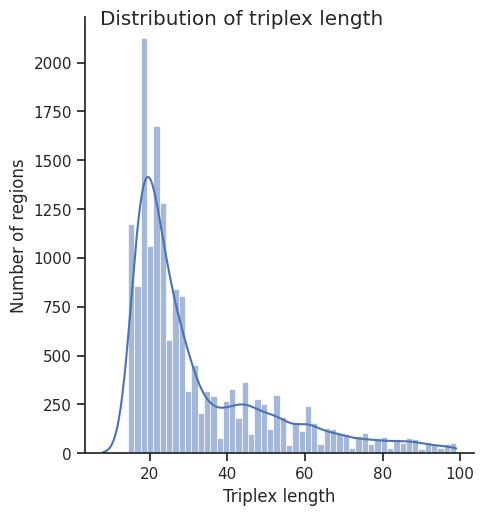

In [ ]:
ax = sns.displot(length, kde=True)
ax.set_axis_labels("Triplex length", "Number of regions")
ax.fig.suptitle('Distribution of triplex length')
plt.show()